# NBA Player Shooting Stats Analysis (1995–2024)

**Author:** Charity Smith  
**Date:** 30 March 2025

### Notebook Description
This notebook explores NBA player shooting performance over time, with a focus on analyzing 3-point percentages across seasons.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import os
from matplotlib.ticker import FuncFormatter

In [2]:
# Set clean style
sns.set(style="whitegrid")

In [3]:
# Load CSV
file_path = "../data/shooting_stats/nba_shooting_all_blocks_1995_2024.csv"
df = pd.read_csv(file_path)

# Preview
df.head()

,Season,Player,FG,FGA,FG%,3P,3PA,3P%,eFG%,Ast'd,%Ast'd
0,2010,Stephen Curry,528,1143,0.462,166,380,0.437,0.535,234,0.443
1,2011,Stephen Curry,505,1053,0.480,151,342,0.442,0.551,212,0.420
2,2012,Stephen Curry,145,296,0.490,55,121,0.455,0.583,73,0.503
3,2013,Stephen Curry,626,1388,0.451,272,600,0.453,0.549,256,0.409
4,2014,Stephen Curry,652,1383,0.471,261,615,0.424,0.566,196,0.301


In [4]:
# Basic info
df.info()

# Check missing values
missing = df.isna().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Drop any rows missing key data (optional based on what you find)
df = df.dropna(subset=['3P%', '3PA', '3P', 'Player', 'Season'])

# Ensure proper data types
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')
df['3P%'] = pd.to_numeric(df['3P%'], errors='coerce')
df['3PA'] = pd.to_numeric(df['3PA'], errors='coerce')
df['3P'] = pd.to_numeric(df['3P'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  183 non-null    int64  
 1   Player  183 non-null    object 
 2   FG      183 non-null    int64  
 3   FGA     183 non-null    int64  
 4   FG%     183 non-null    float64
 5   3P      183 non-null    int64  
 6   3PA     183 non-null    int64  
 7   3P%     183 non-null    float64
 8   eFG%    183 non-null    float64
 9   Ast'd   183 non-null    int64  
 10  %Ast'd  183 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 15.9+ KB

Missing Values:
 Series([], dtype: int64)


### EDA and Visualizations

In [6]:
# Top players by total 3PM (career)
career_3p = df.groupby('Player')['3P'].sum().sort_values(ascending=False).head(10)
print("Top 10 All-Time by Total 3PM:\n", career_3p)

# Seasons covered
print(f"Seasons: {df['Season'].min()} - {df['Season'].max()}")

Top 10 All-Time by Total 3PM:
 Player
Stephen Curry        3747
James Harden         2940
Damian Lillard       2607
LeBron James         2410
Kevin Durant         2030
Kobe Bryant          1827
Jayson Tatum         1296
Russell Westbrook    1273
Devin Booker         1241
Luka Doncic          1201
Name: 3P, dtype: int64
Seasons: 1997 - 2024


In [7]:
# Create output directory if it doesn't exist
output_dir = "../visualizations/players"
os.makedirs(output_dir, exist_ok=True)

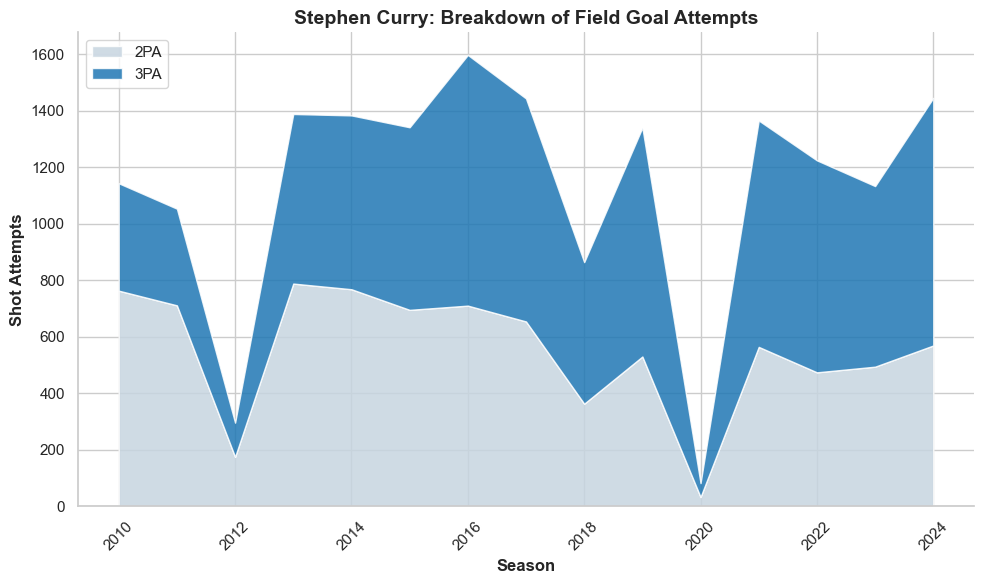

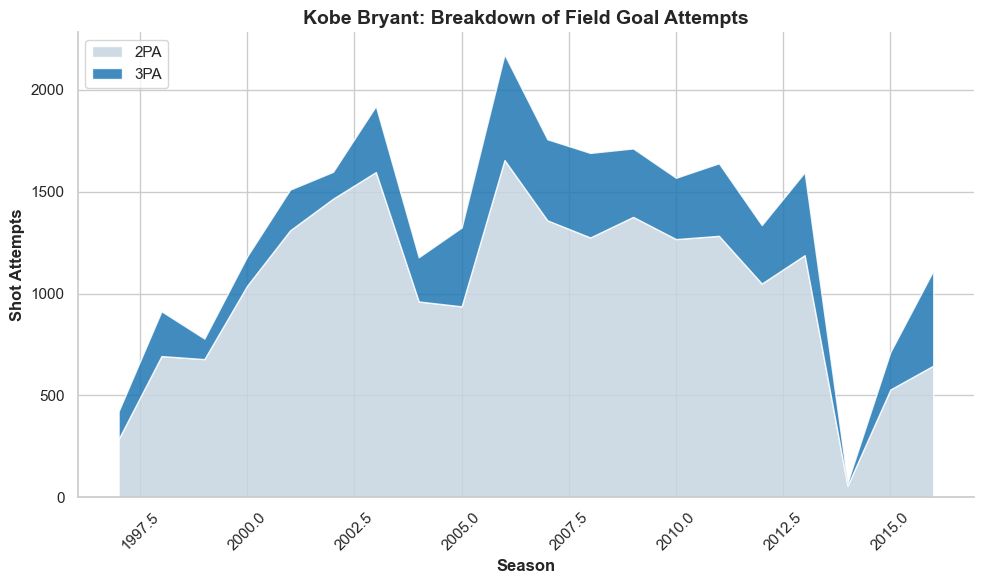

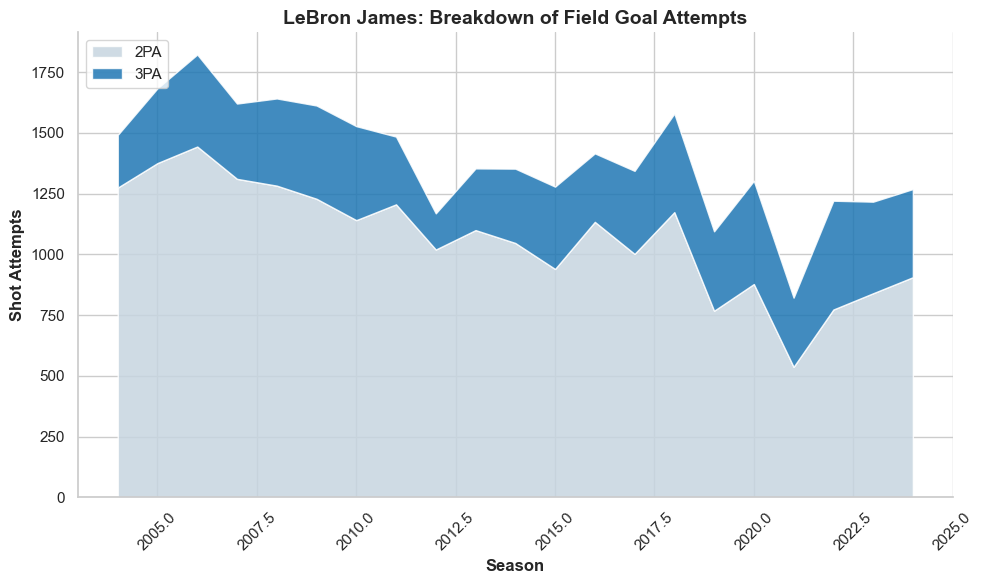

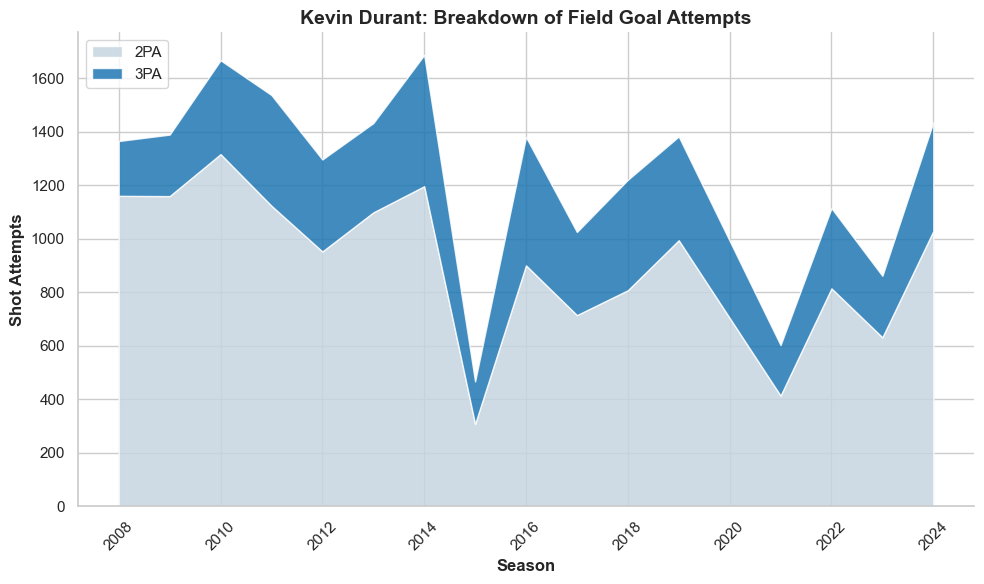

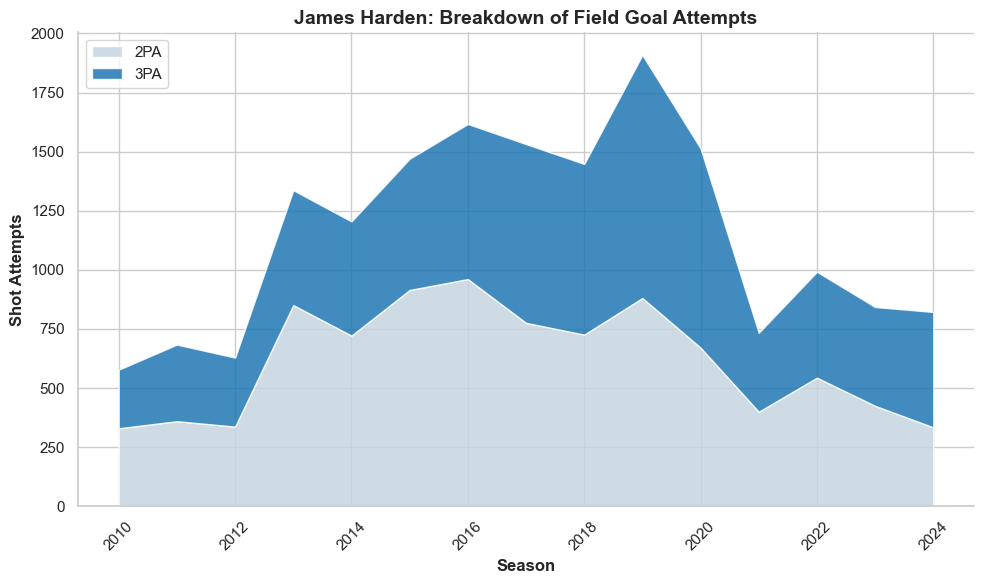

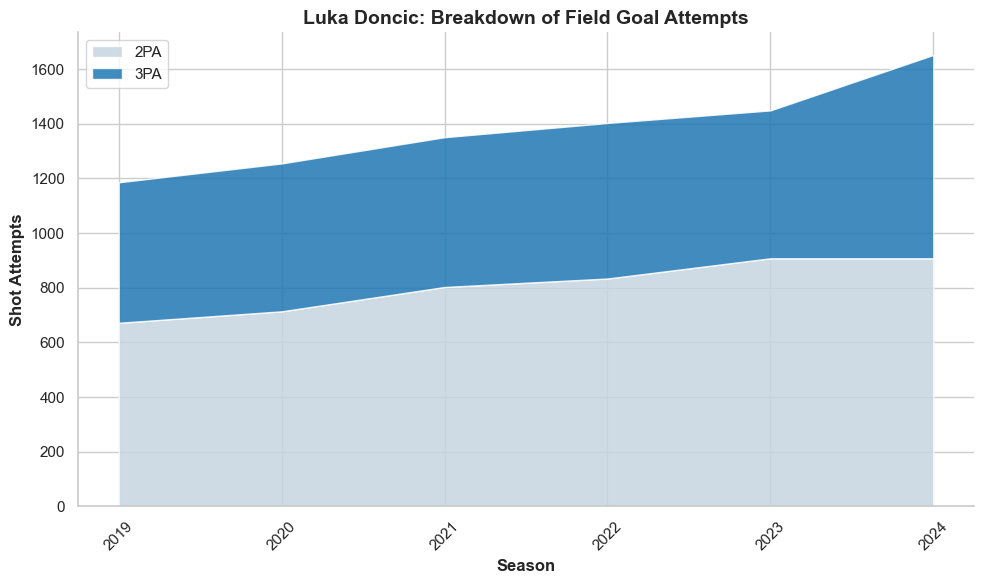

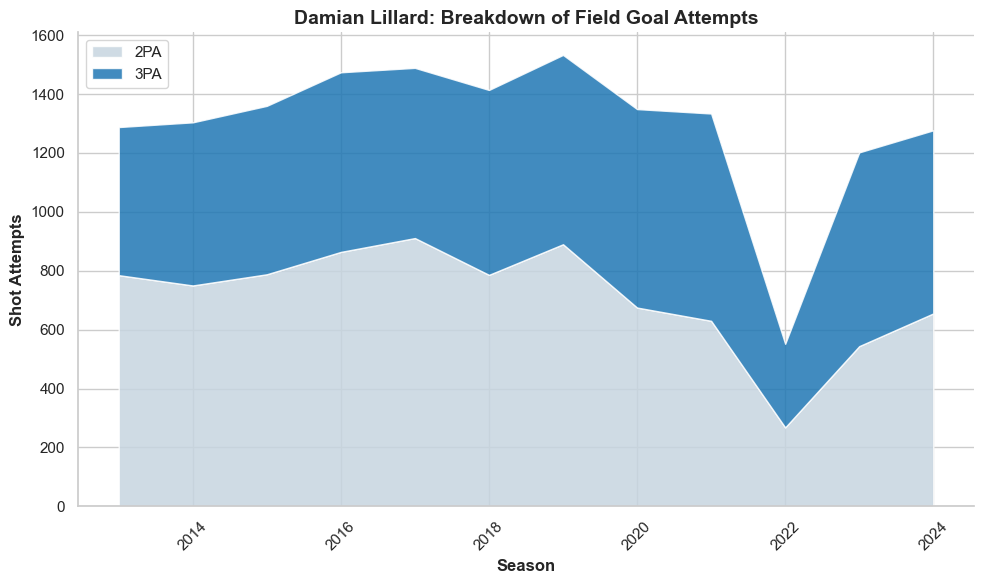

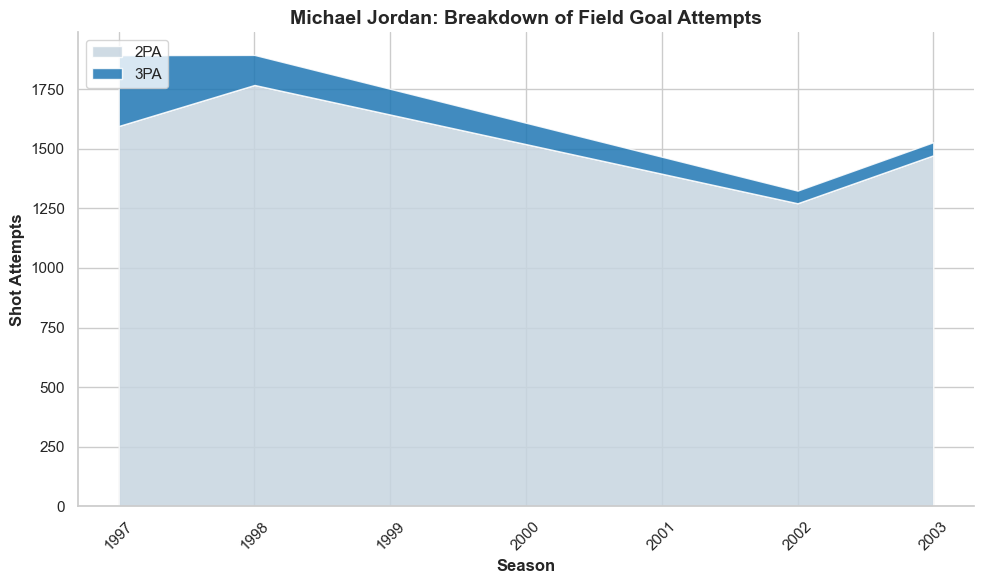

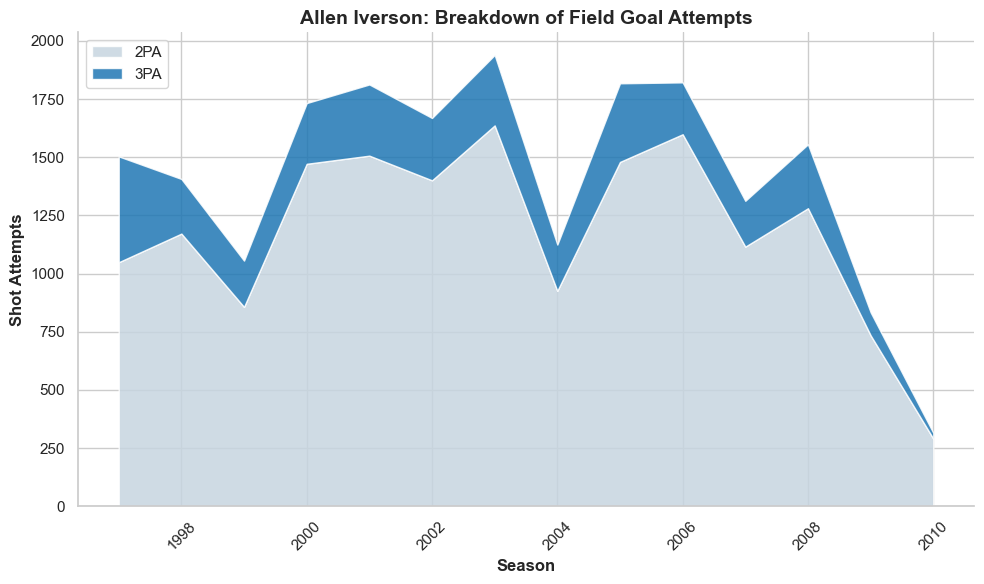

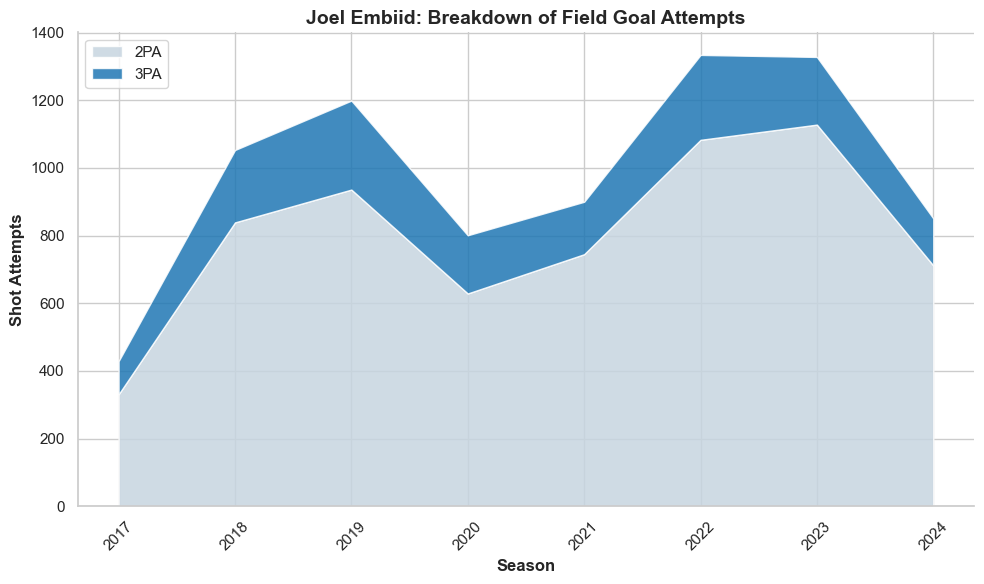

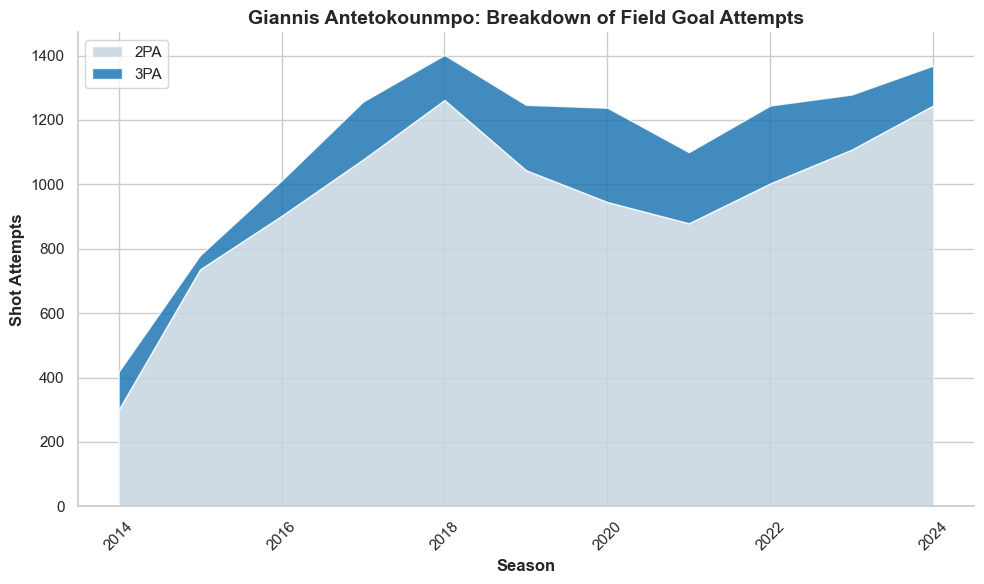

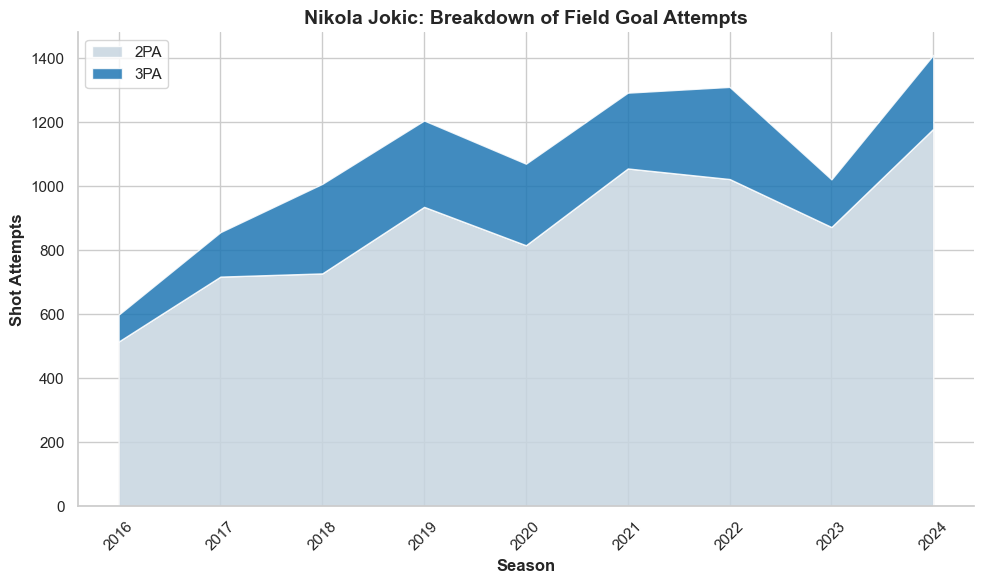

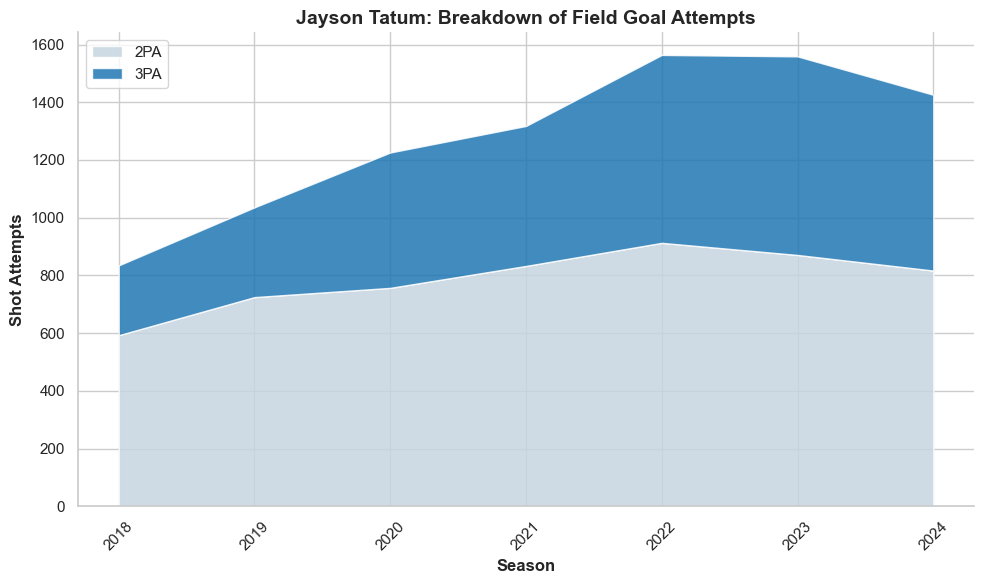

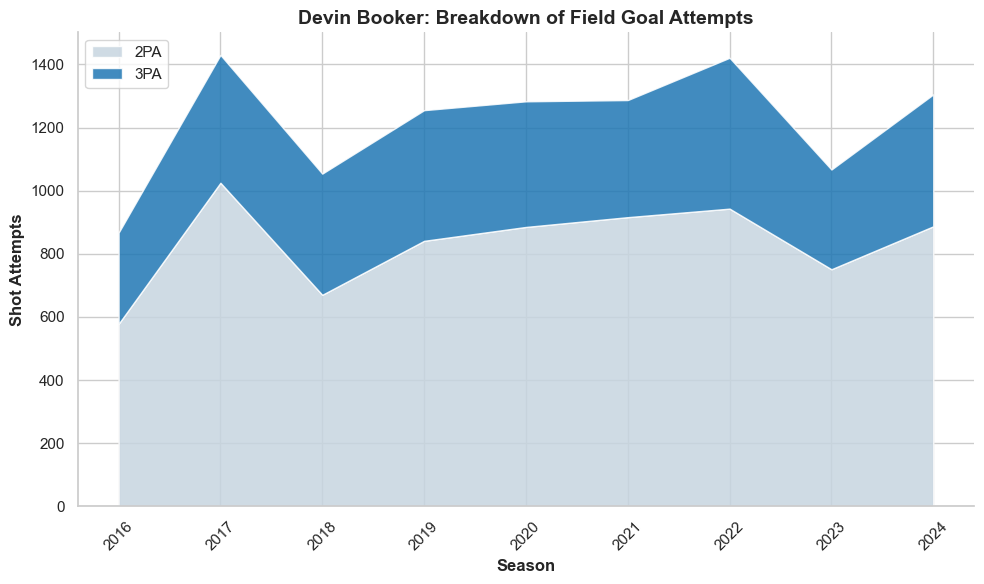

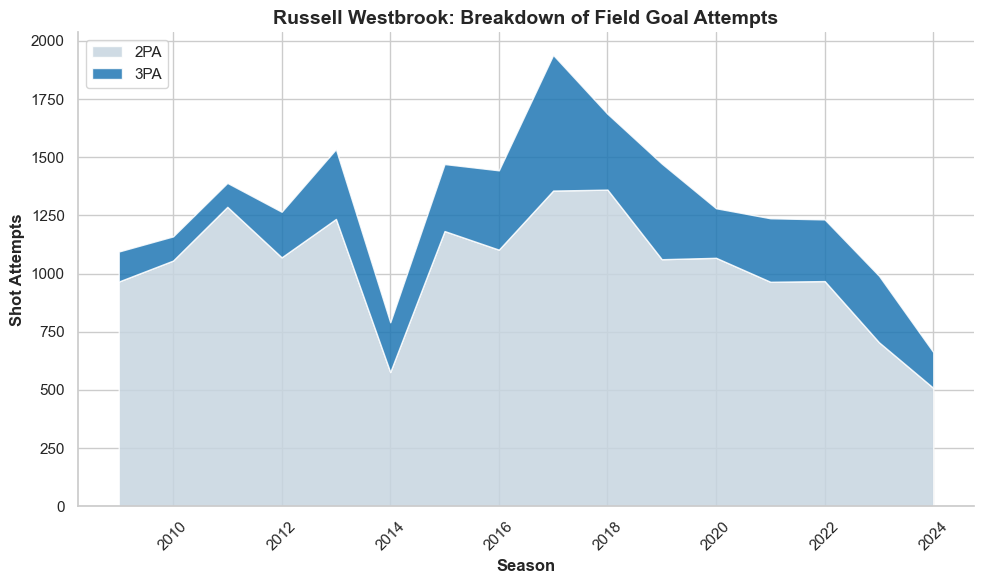

In [8]:
# Loop through each player
players = df['Player'].unique()

for player in players:
    player_df = df[df['Player'] == player].copy()

    # Skip if not enough data
    if player_df.shape[0] < 2:
        continue

    # Calculate 2-point attempts
    player_df['2PA'] = player_df['FGA'] - player_df['3PA']
    player_df = player_df.sort_values(by='Season')

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.stackplot(
        player_df['Season'],
        player_df['2PA'],
        player_df['3PA'],
        labels=['2PA', '3PA'],
        colors=['#c7d5e0', '#1f77b4'],
        alpha=0.85
    )

    ax.set_title(f"{player}: Breakdown of Field Goal Attempts", fontsize=14, weight='bold')
    ax.set_xlabel("Season", fontsize=12, weight='bold')
    ax.set_ylabel("Shot Attempts", fontsize=12, weight='bold')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    sns.despine()
    plt.tight_layout()

    # Show plot in notebook
    plt.show()

    # Save plot
    safe_name = player.lower().replace(" ", "_").replace(".", "")
    filename = f"{safe_name}_fga_breakdown_stackplot.png"
    full_path = os.path.join(output_dir, filename)
    fig.savefig(full_path, dpi=300)
    plt.close(fig)

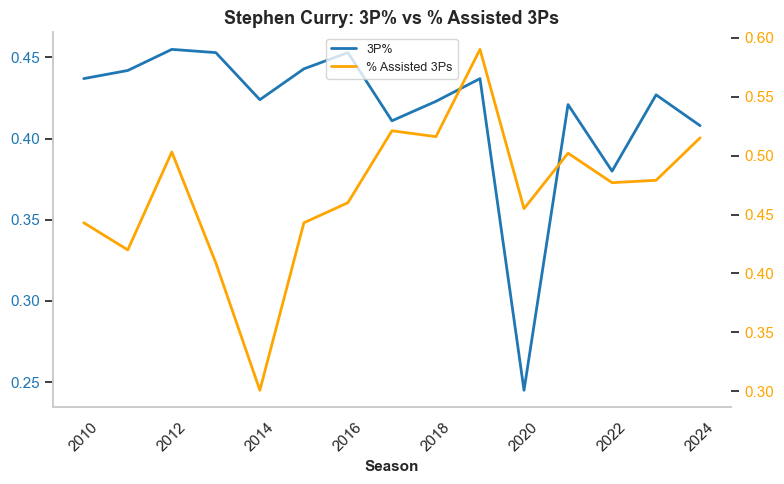

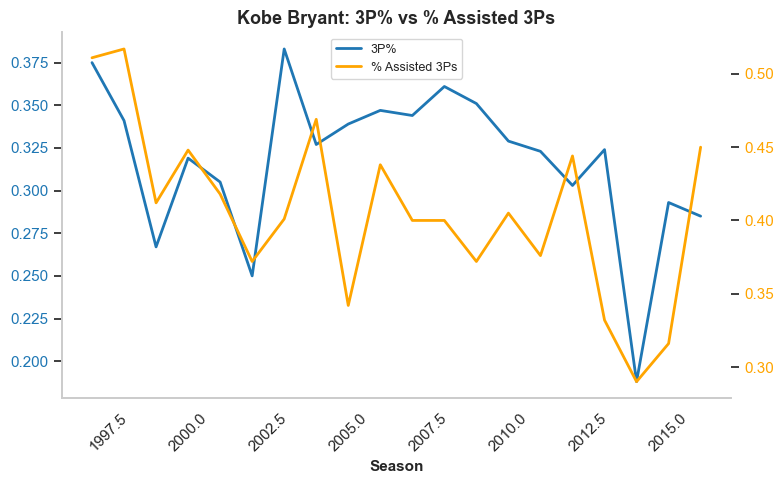

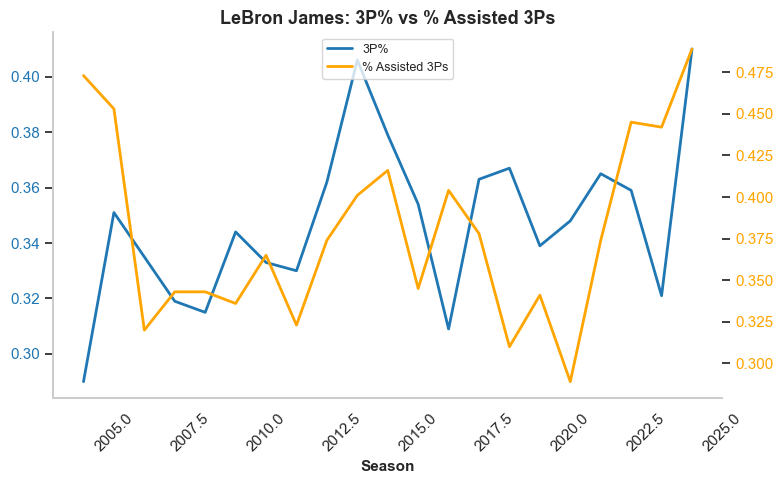

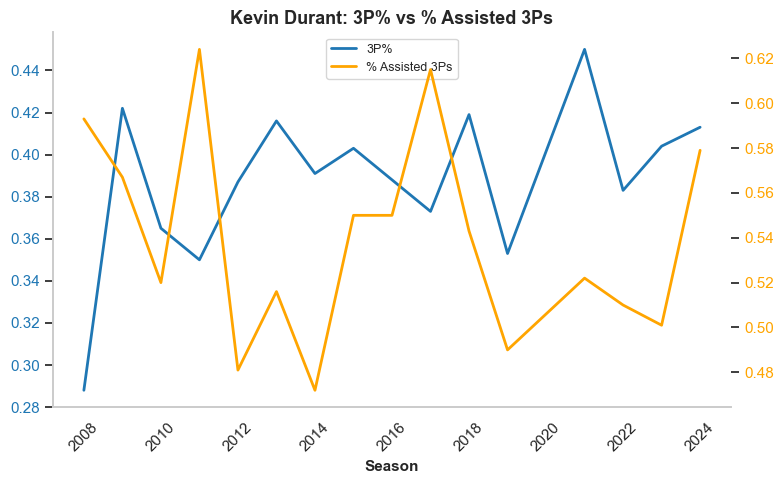

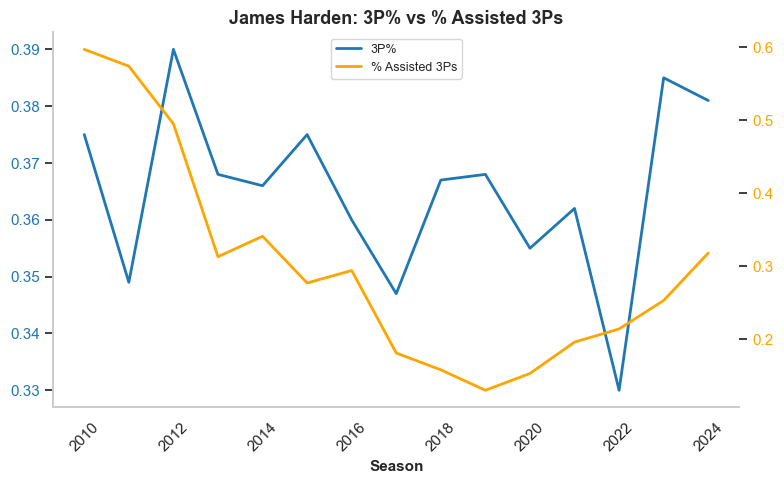

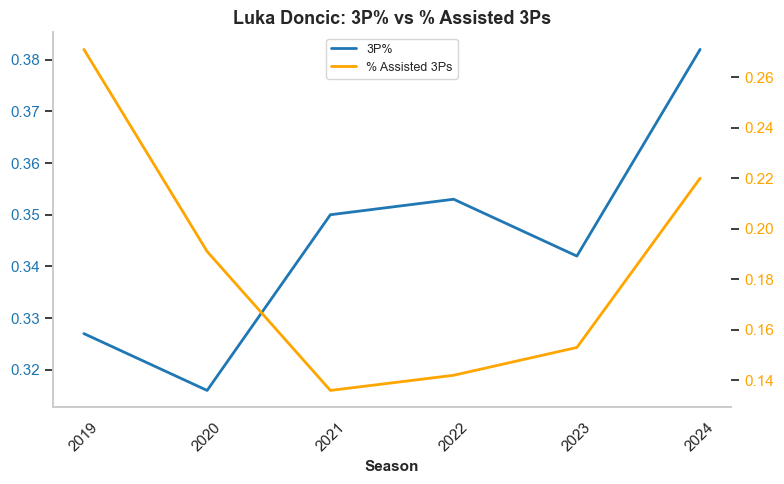

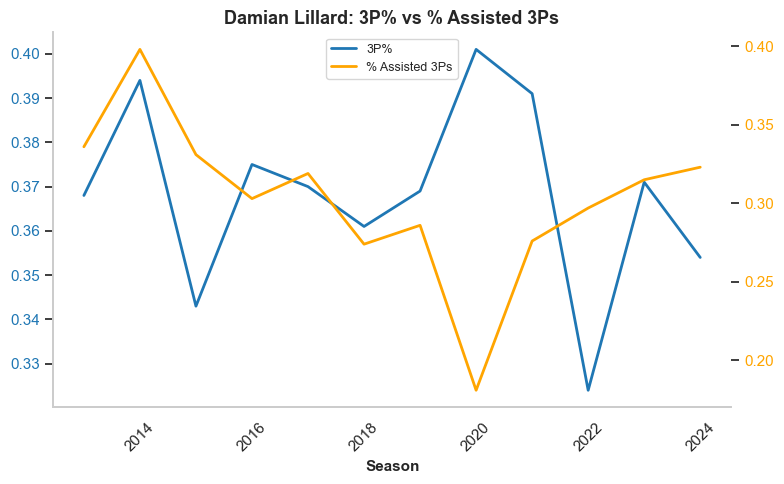

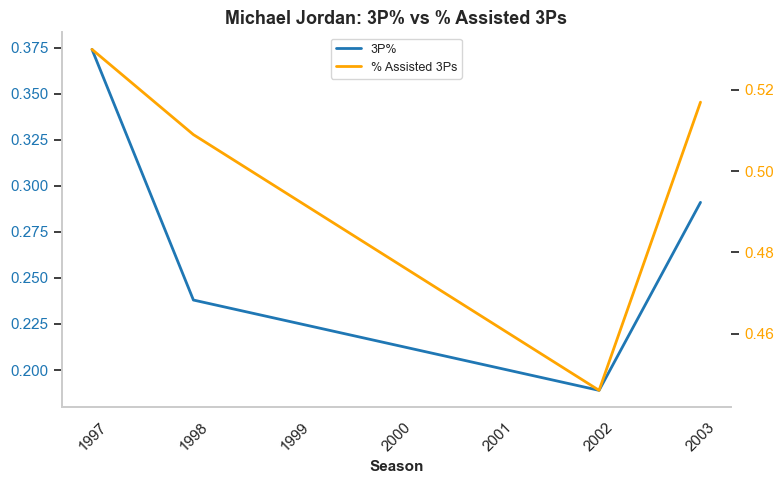

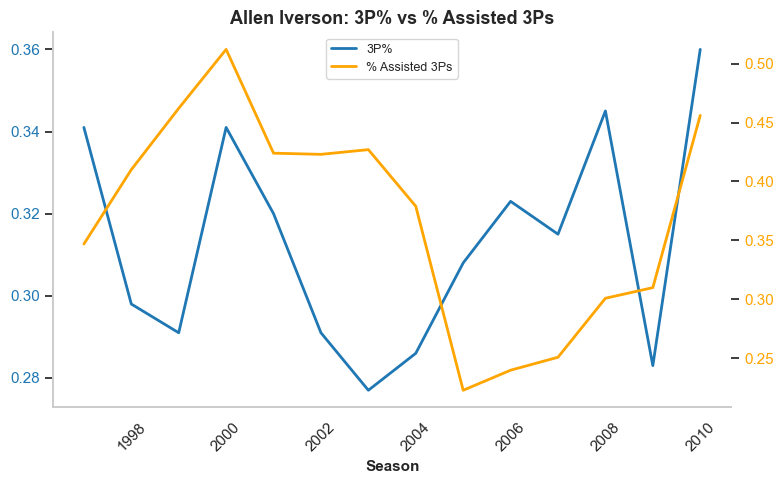

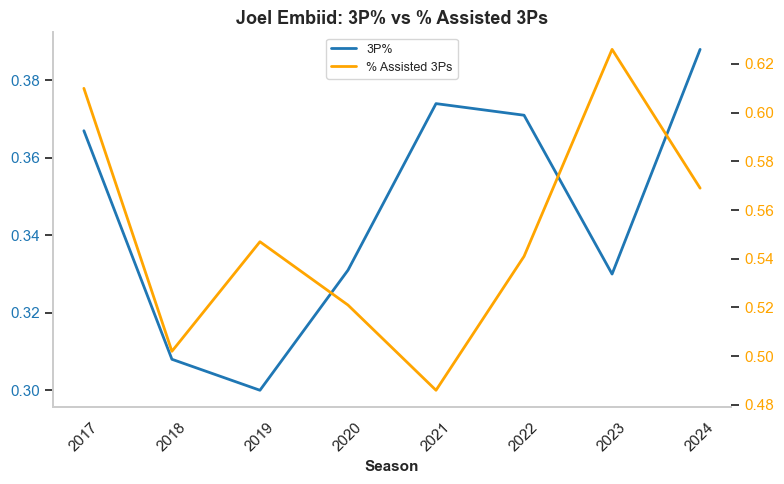

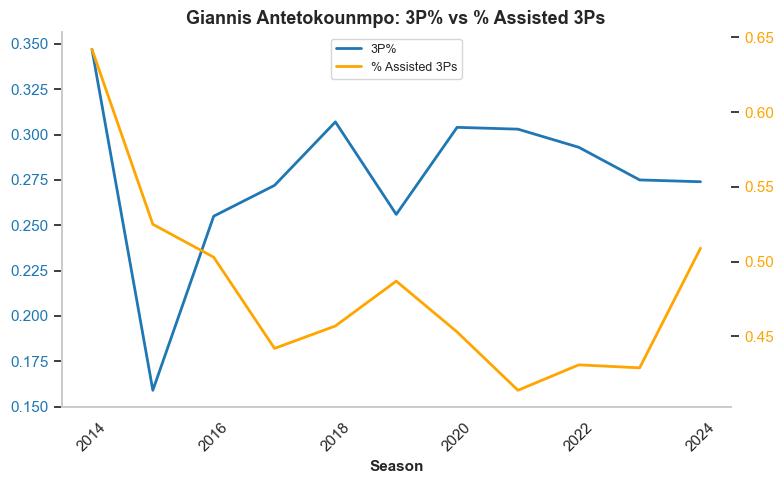

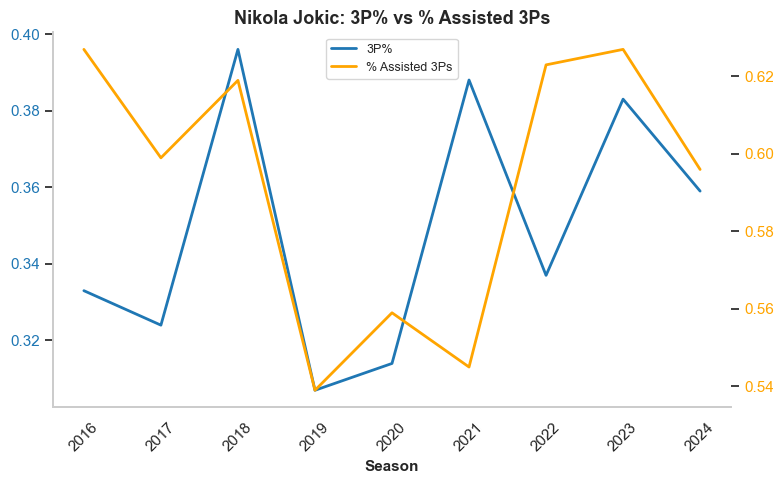

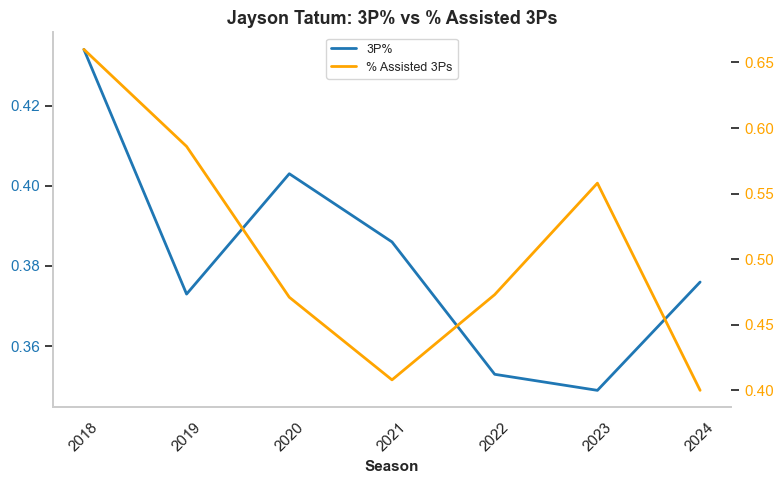

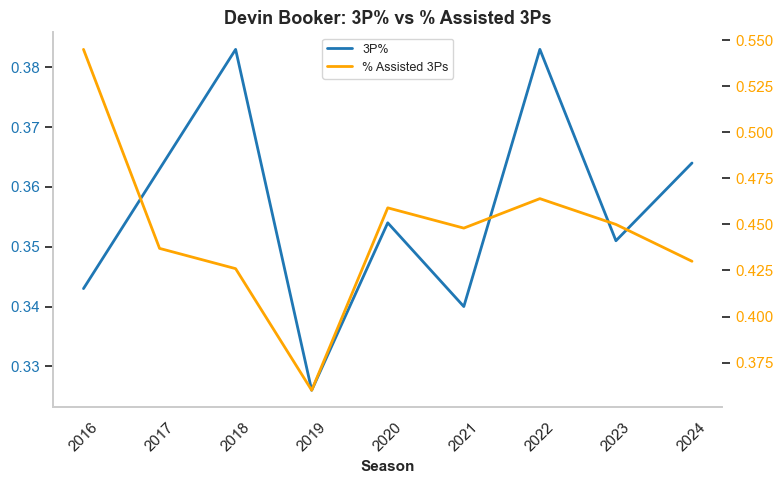

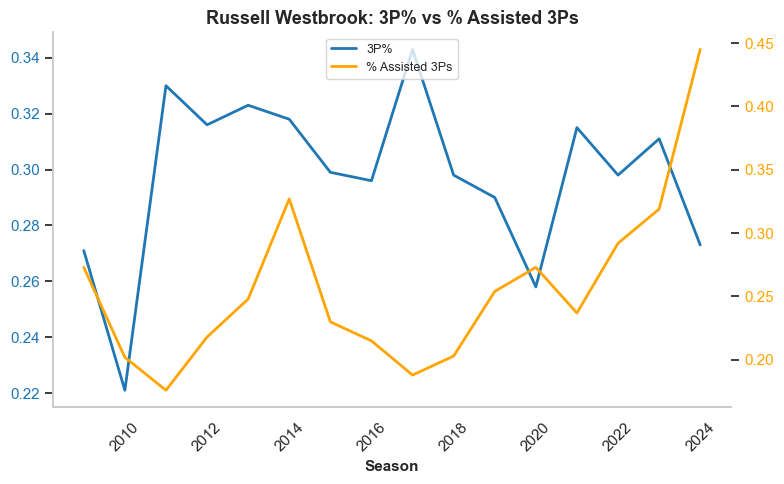

In [10]:
# Loop through each player
for player in df['Player'].unique():
    player_df = df[df['Player'] == player].copy()

    if player_df.shape[0] < 2:
        continue

    player_df = player_df.sort_values(by='Season')

    # Create plot
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # 3P% line
    ax1.plot(
        player_df['Season'],
        player_df['3P%'],
        color='#1f77b4',
        linewidth=2,
        label="3P%"
    )
    ax1.tick_params(axis='y', labelcolor='#1f77b4')

    # % Assisted 3Ps on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(
        player_df['Season'],
        player_df["%Ast'd"],
        color='orange',
        linewidth=2,
        label="% Assisted 3Ps"
    )
    ax2.tick_params(axis='y', labelcolor='orange')

    # Remove grid and labels
    ax1.set_ylabel("")
    ax2.set_ylabel("")
    ax1.grid(False)
    ax2.grid(False)

    # X-axis settings
    ax1.set_xlabel("Season", fontsize=11, weight='bold')
    ax1.set_title(f"{player}: 3P% vs % Assisted 3Ps", fontsize=13, weight='bold')
    ax1.tick_params(axis='x', rotation=45)

    # Despine right only
    sns.despine(left=False, right=True)

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', fontsize=9)

    # Save and show
    plt.tight_layout()
    plt.show()

    safe_name = player.lower().replace(" ", "_").replace(".", "")
    filename = f"{safe_name}_3p_vs_assisted_3ps.png"
    fig.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.close(fig)

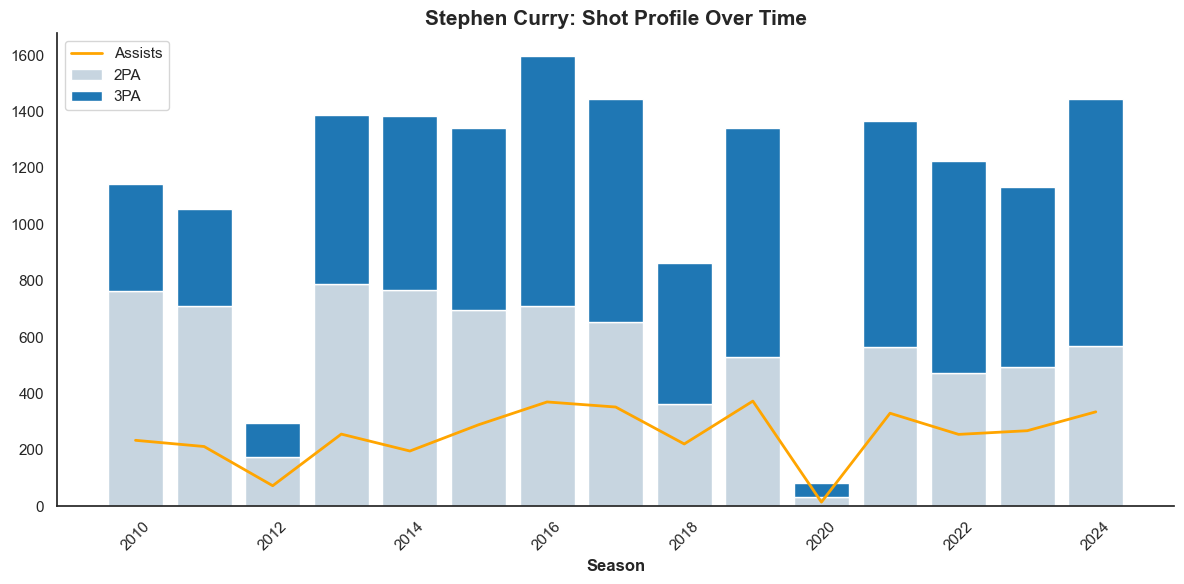

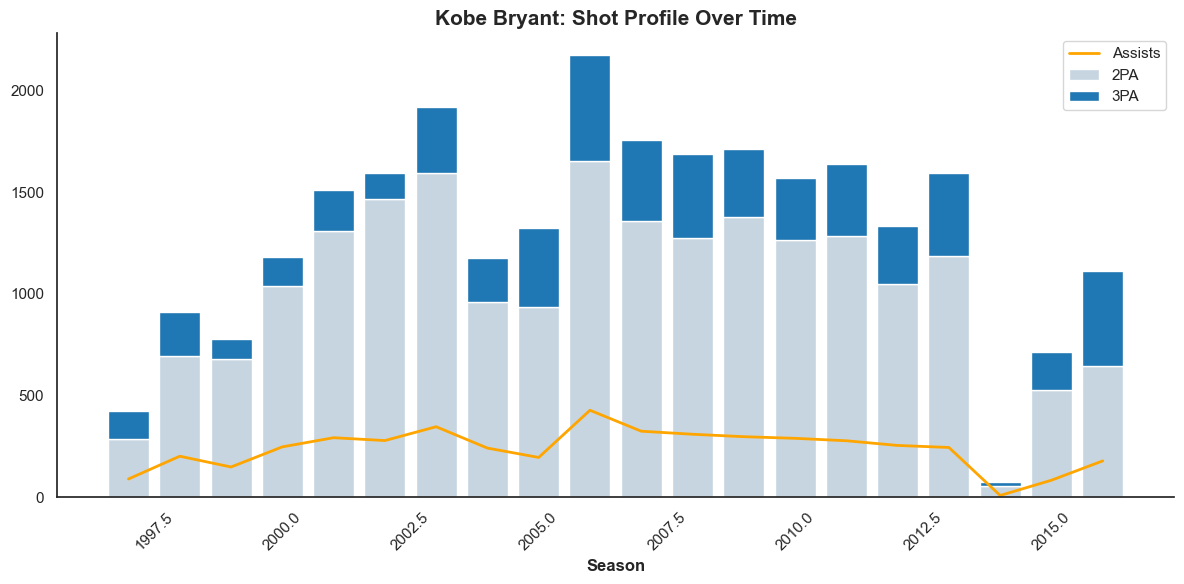

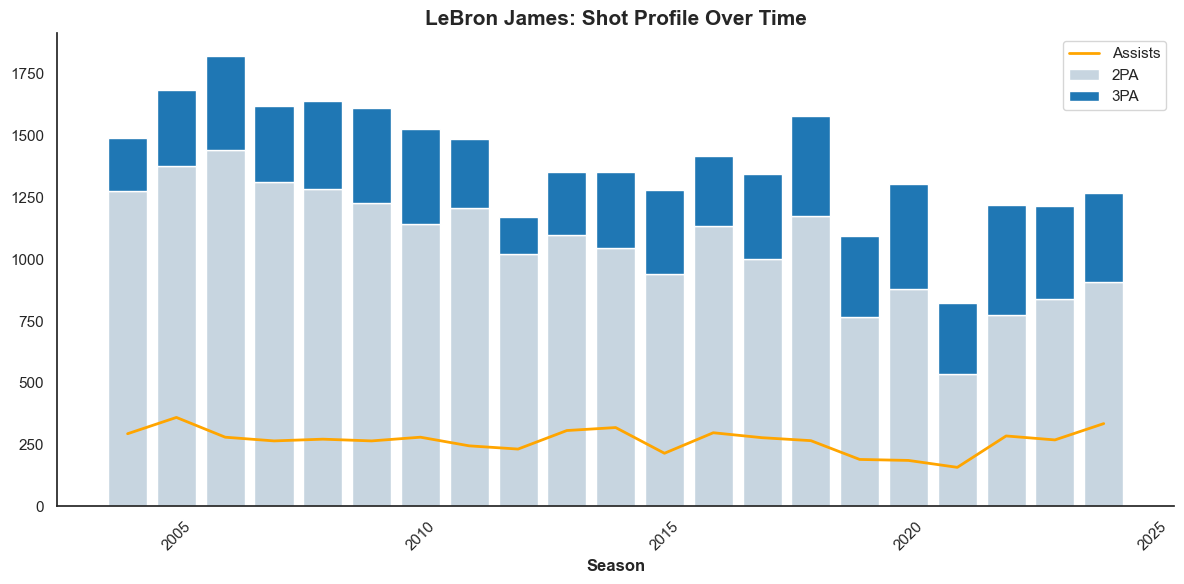

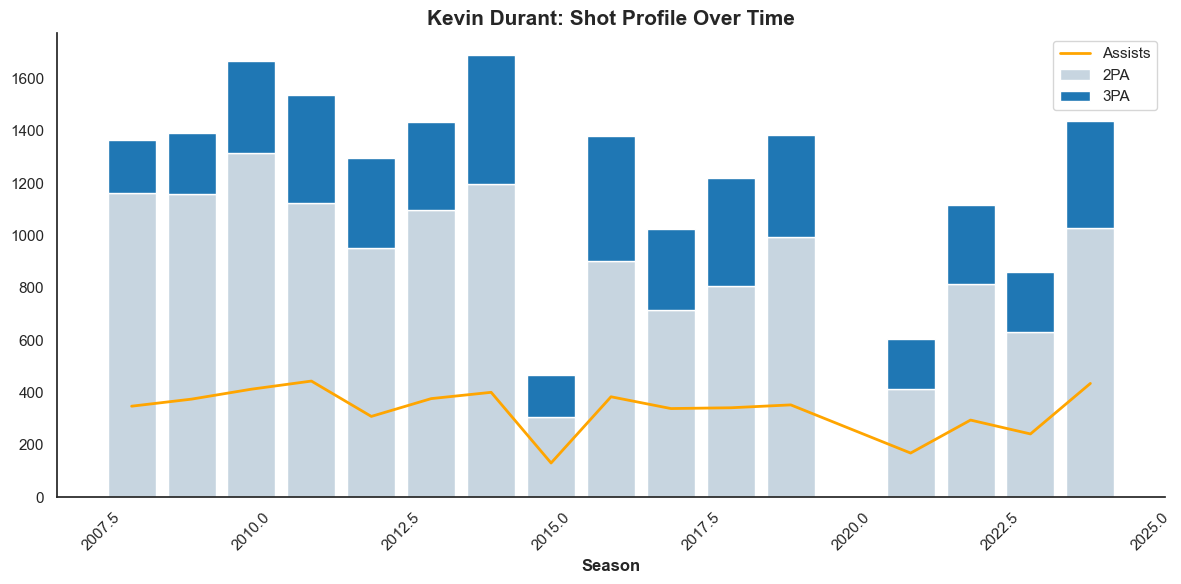

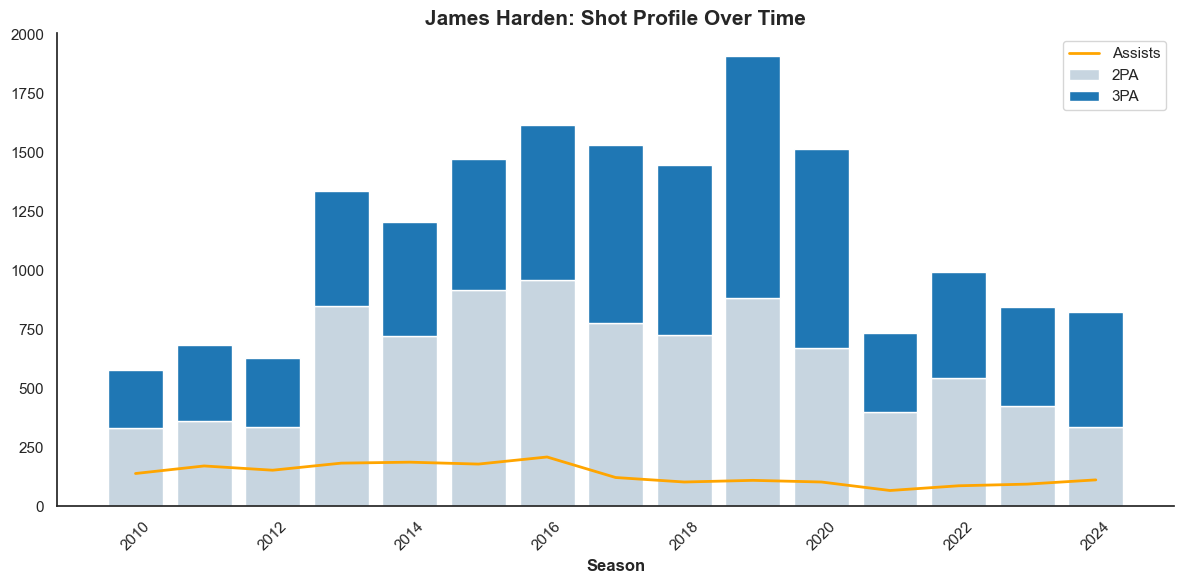

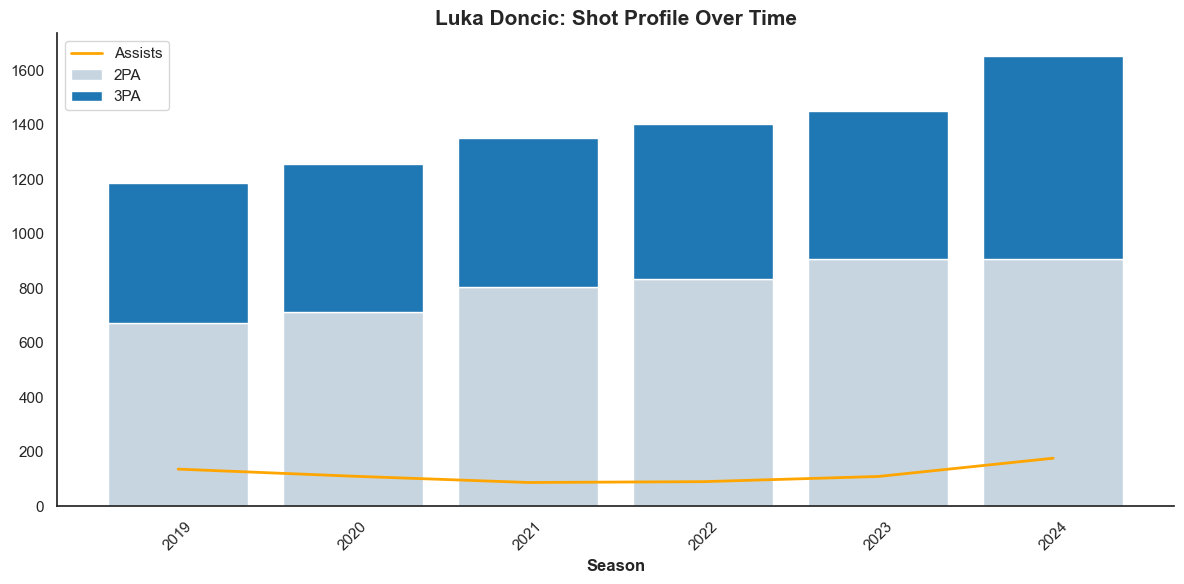

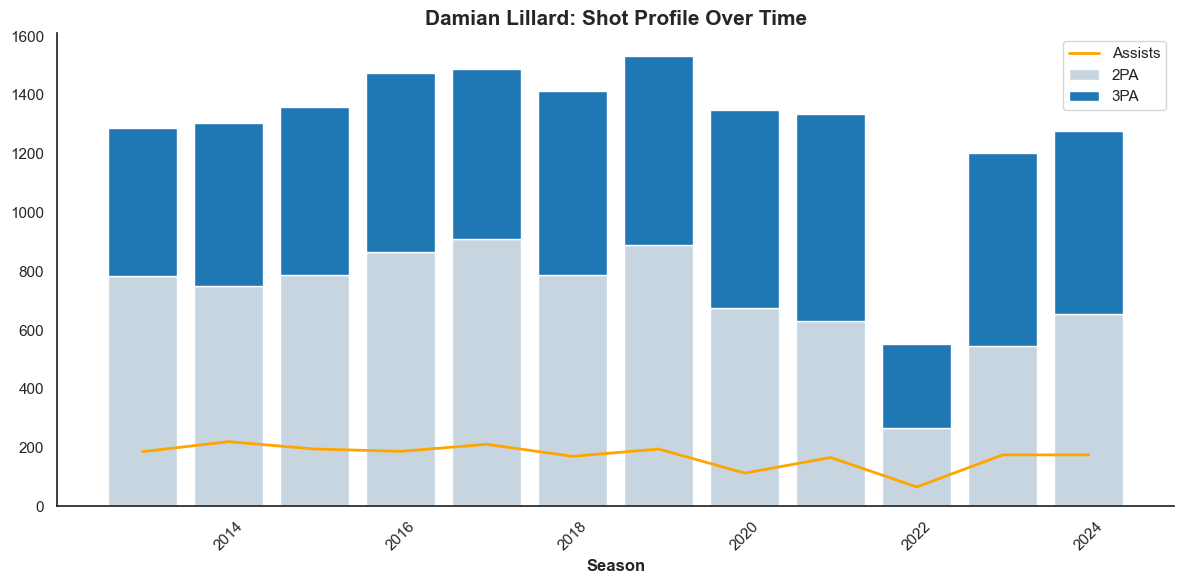

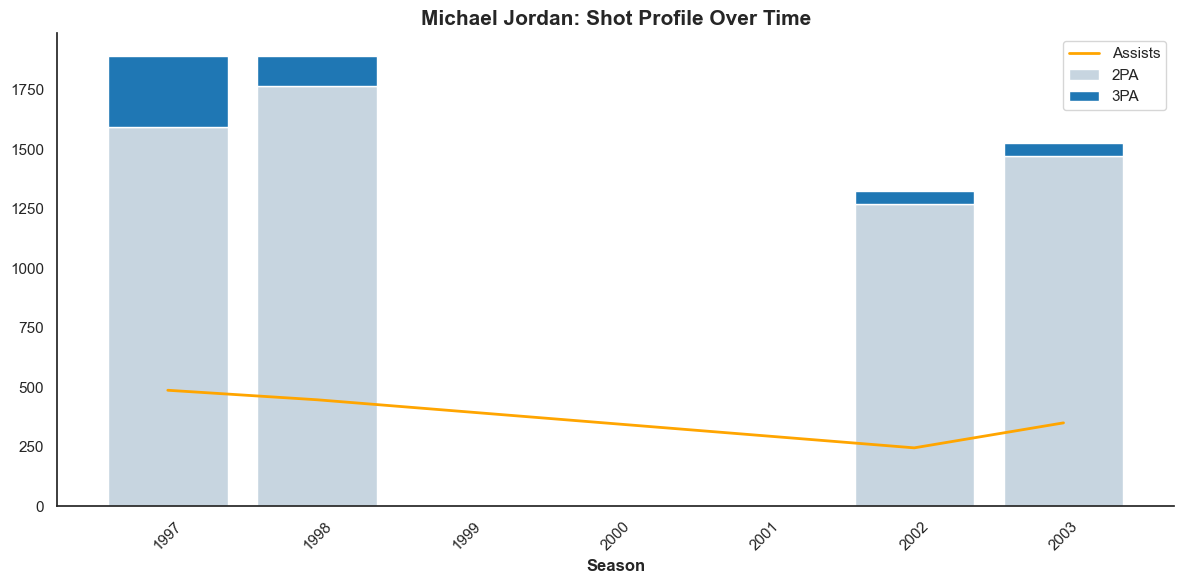

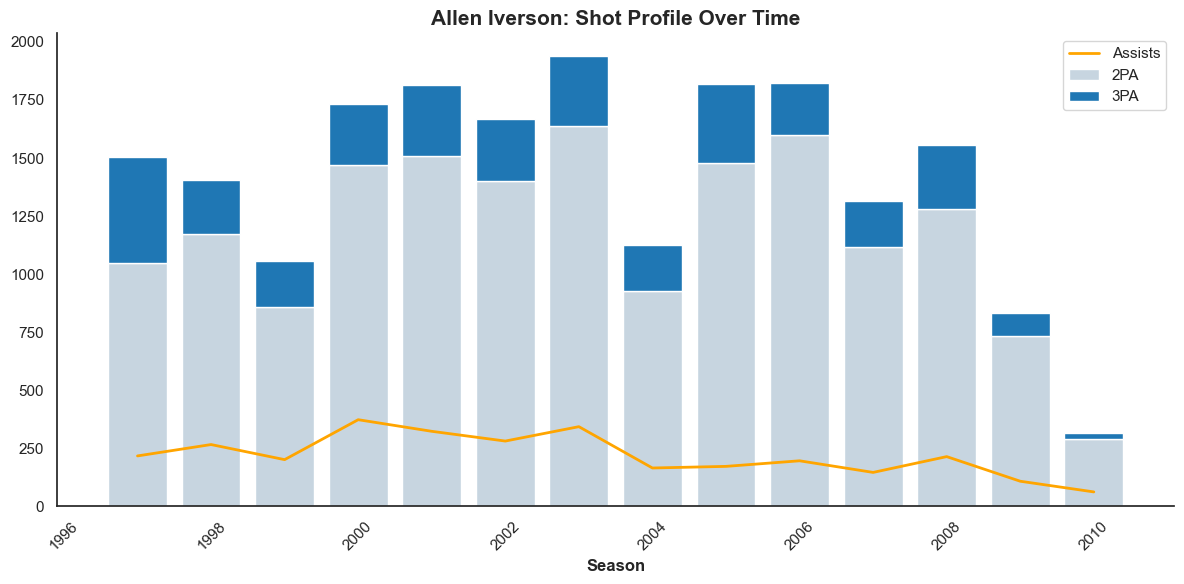

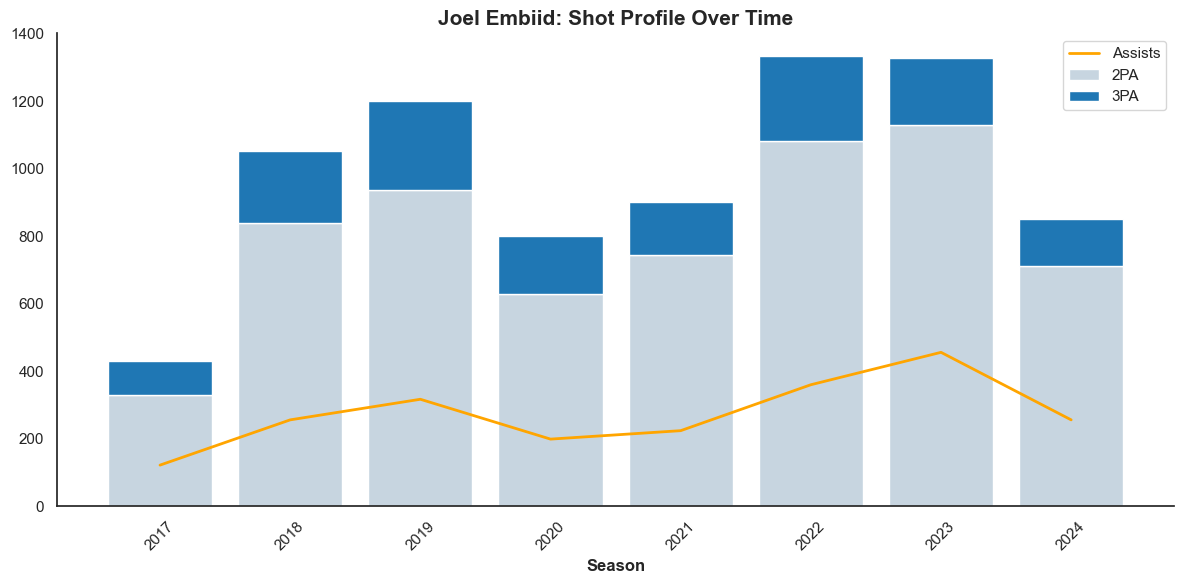

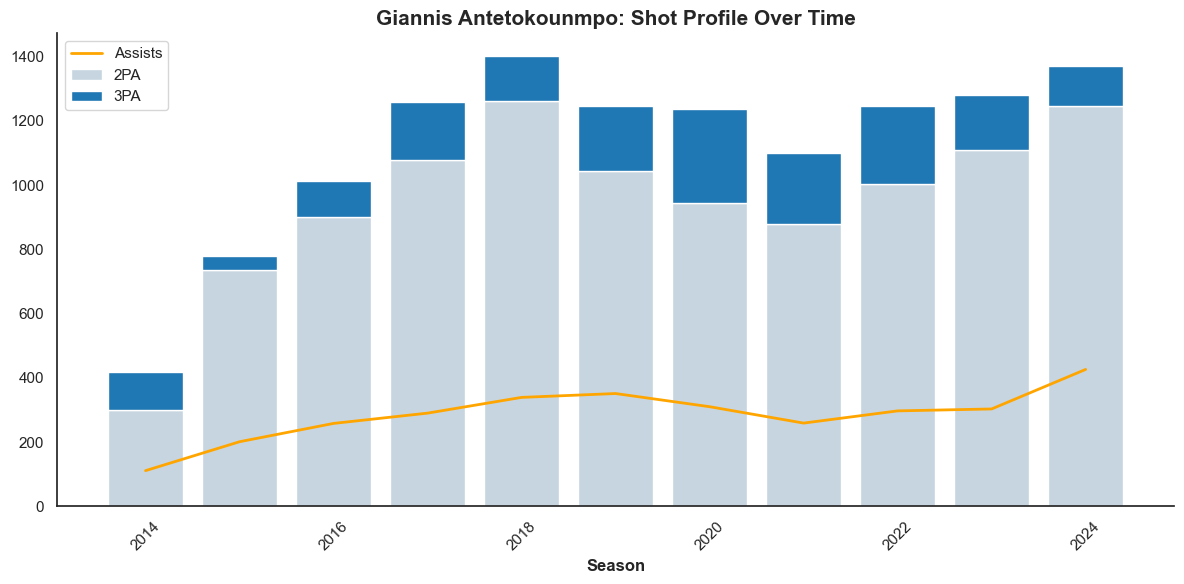

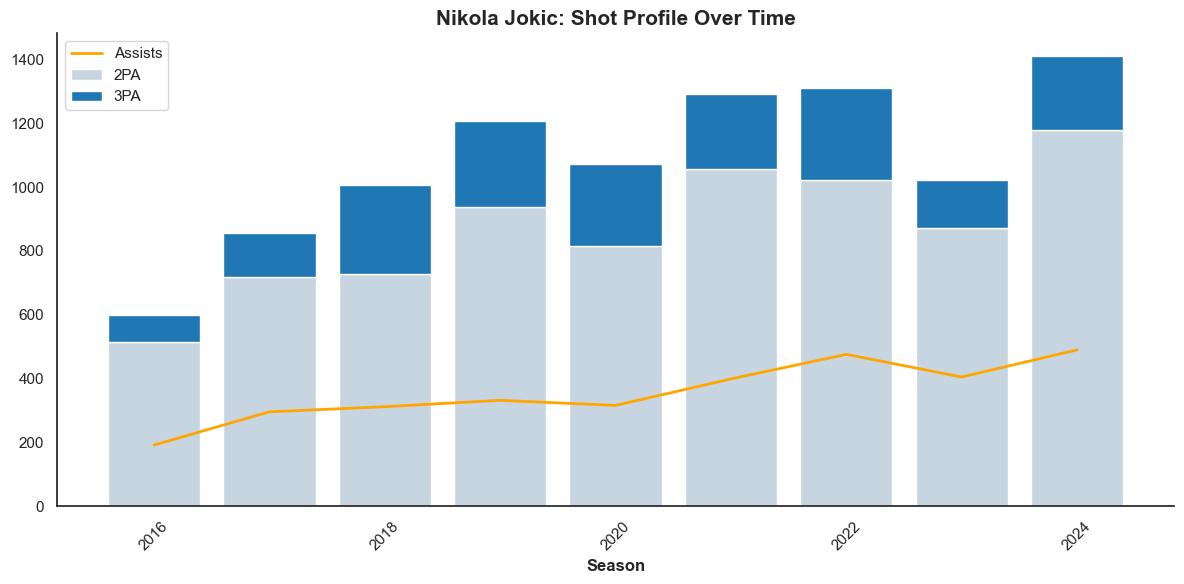

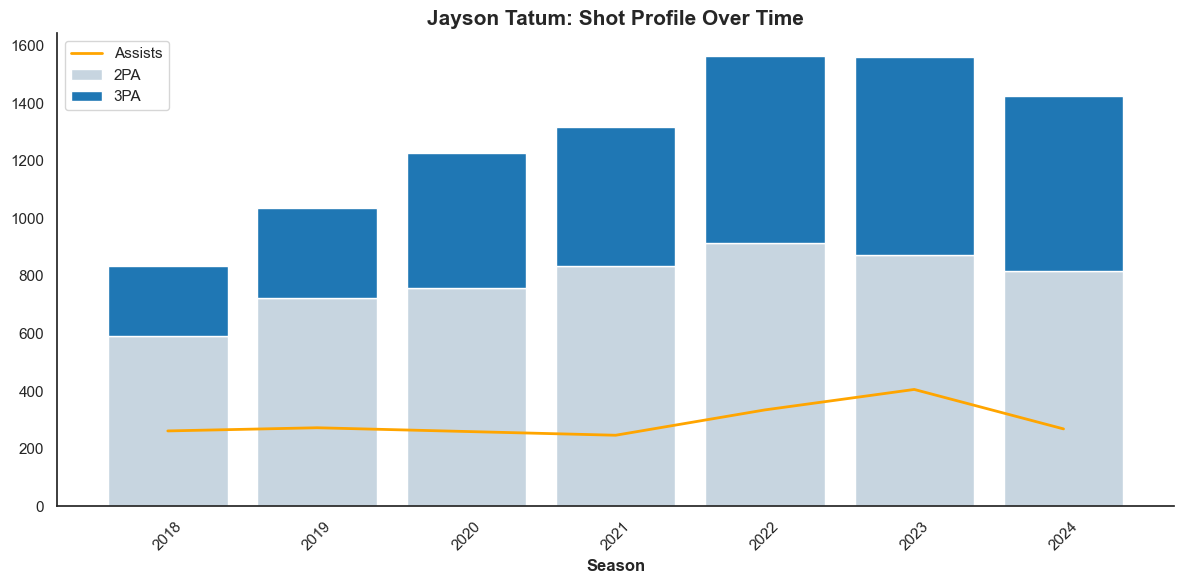

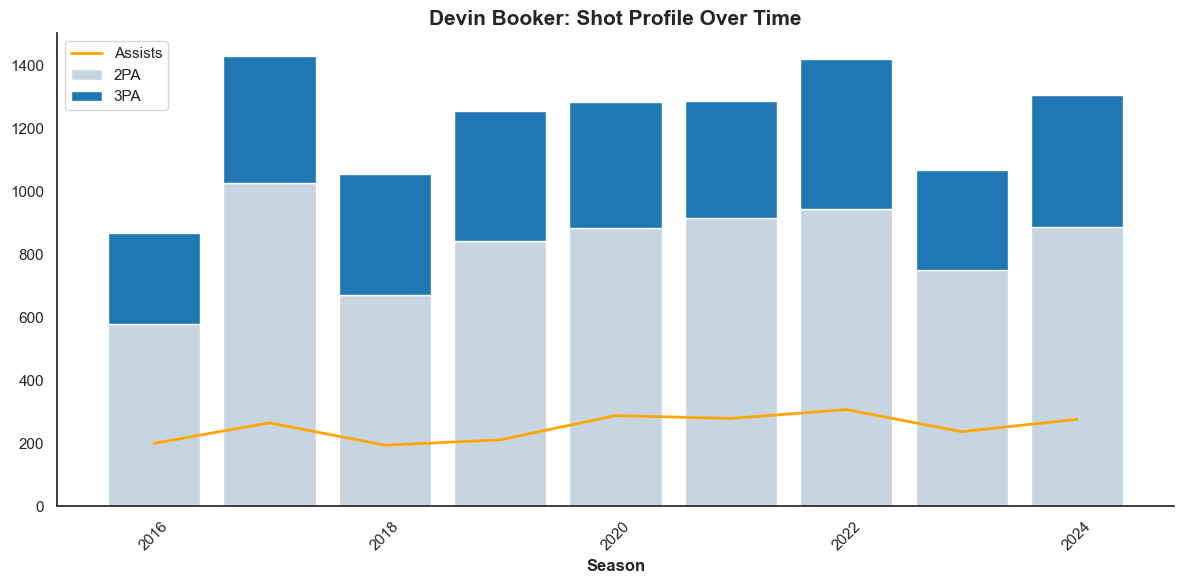

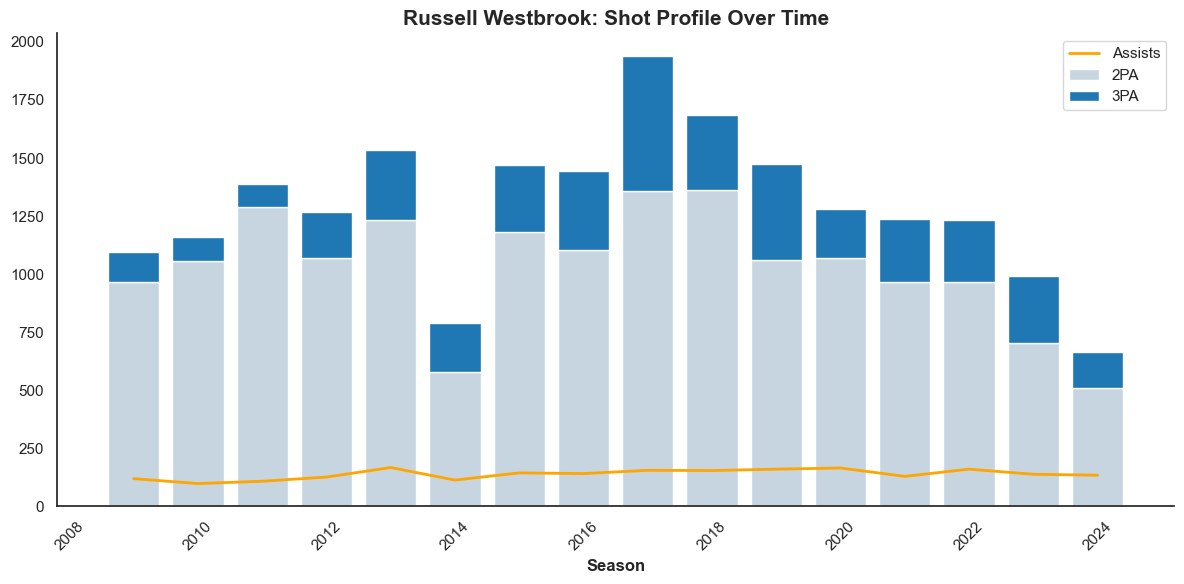

In [12]:
# Get list of unique players
players = df["Player"].unique()

# Loop through each player
for player_name in players:
    player_df = df[df["Player"] == player_name].copy()

    # Skip players with only 1 season of data
    if player_df.shape[0] < 2:
        continue

    # Sort by season
    player_df = player_df.sort_values(by="Season")

    # Calculate 2-point attempts
    player_df["2PA"] = player_df["FGA"] - player_df["3PA"]

    # Plot setup
    plt.figure(figsize=(12, 6))
    sns.set(style="white")

    # Bars and line
    plt.bar(player_df["Season"], player_df["2PA"], label="2PA", color="#c7d5e0")
    plt.bar(player_df["Season"], player_df["3PA"], bottom=player_df["2PA"], label="3PA", color="#1f77b4")
    plt.plot(player_df["Season"], player_df["Ast'd"], label="Assists", color="orange", linewidth=2)

    # Labels and style
    plt.title(f"{player_name}: Shot Profile Over Time", fontsize=15, weight="bold")
    plt.xlabel("Season", fontsize=12, weight="bold")
    plt.xticks(rotation=45)
    plt.legend()
    sns.despine()
    plt.tight_layout()

    # Save to file
    safe_name = player_name.lower().replace(" ", "_").replace(".", "")
    output_path = os.path.join(output_dir, f"{safe_name}_shot_profile.png")
    plt.savefig(output_path, dpi=300)

    # Show in notebook
    plt.show()

    # Close figure to avoid overlap
    plt.close()